In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
import pandas as pd

df=pd.read_csv("D:\Thesis\messy work\Final.csv")
df['TURBIDITY']=pd.to_numeric(df['TURBIDITY'],errors='coerce')
df['Labels']=df.Labels.astype(float)
df=df[['TEMPL','PHL','EC','CHLORIDE','TALKAL','TURBIDITY','DO','BOD','Labels']]

XRaw=np.array(df)
XRaw=np.random.permutation(XRaw)

def norm(X):
    meanAr=np.mean(X,axis=1)
    meanAr=np.reshape(meanAr,(meanAr.shape[0],1))
    varAr=np.var(X,axis=1)
    varAr=np.reshape(varAr,(varAr.shape[0],1))
    normX=np.divide(np.subtract(X,meanAr),varAr)
    return normX,meanAr,varAr

def normRet(X,XTrainMean,XTrainVar):
    normX=np.divide(np.subtract(X,XTrainMean),XTrainVar)
    return normX

Val=XRaw[0:100,:]
Test=XRaw[100:200,:]
Train=XRaw[200:-1,:]

def oneHot(labels,C):
    C=tf.constant(C)
    oneHotMat=tf.one_hot(labels,C,axis=0)
    sess=tf.Session()
    oneHot=sess.run(oneHotMat)
    sess.close()
    return oneHot

XTrainR=np.transpose(Train[:,0:-1])
XTrain,Xmean,Xvar=norm(XTrainR)
YTrain=Train[:,-1]
YTrain=np.transpose(YTrain)    #No need to reshape as one_hot handles the the missing dimension automatically
YTrain=oneHot(YTrain,10)

XTestR=np.transpose(Test[:,0:-1])
XTest=normRet(XTestR,Xmean,Xvar)
YTest=Test[:,-1]
YTest=np.transpose(YTest)
YTest=oneHot(YTest,10)

XValR=np.transpose(Val[:,0:-1])
XVal=normRet(XValR,Xmean,Xvar)
YVal=Val[:,-1]
YVal=np.transpose(YVal)
YVal=oneHot(YVal,10)




In [30]:
print(XTrainR,XTrainR.shape)
print(YTrain,YTrain.shape)
print(XTrain,XTrain.shape)

[[  30.     22.     28.   ...,   24.     27.     23.  ]
 [   6.9     7.28    7.15 ...,    7.11    7.18    7.15]
 [ 100.    620.    140.   ...,  162.    216.    540.  ]
 ..., 
 [ 100.     10.      8.   ...,    6.      6.      6.3 ]
 [   7.4     1.      6.2  ...,    6.      5.5     3.4 ]
 [   1.5    14.      3.4  ...,    2.8     2.4    10.  ]] (8, 3794)
[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (10, 3794)
[[  3.16299865e-01  -7.58897919e-01   4.75004187e-02 ...,  -4.90098473e-01
   -8.68993043e-02  -6.24498196e-01]
 [ -1.35007077e+00   1.67206545e-01  -3.51862011e-01 ...,  -5.11575413e-01
   -2.32076960e-01  -3.51862011e-01]
 [ -4.39135717e-04   1.00548490e-04  -3.97621548e-04 ...,  -3.74788754e-04
   -3.18744625e-04   1.75201505e-05]
 ..., 
 [  2.87669990e-02  -5.10990297e-03  -5.86272301e-03 ...,  -6.61554305e-03
   -6.61554305e-0

In [31]:
def createPlace(nX,nY):
    X=tf.placeholder(tf.float32,shape=(nX,None))
    Y=tf.placeholder(tf.float32,shape=(nY,None))
    return X,Y

def initParameters():
    W1 = tf.get_variable("W1",[40,8],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b1 = tf.get_variable("b1",[40,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W2 = tf.get_variable("W2",[50,40],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b2 = tf.get_variable("b2",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W3 = tf.get_variable("W3",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b3 = tf.get_variable("b3",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W4 = tf.get_variable("W4",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b4 = tf.get_variable("b4",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W5 = tf.get_variable("W5",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b5 = tf.get_variable("b5",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W6 = tf.get_variable("W6",[50,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b6 = tf.get_variable("b6",[50,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W7 = tf.get_variable("W7",[40,50],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b7 = tf.get_variable("b7",[40,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W8 = tf.get_variable("W8",[35,40],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b8 = tf.get_variable("b8",[35,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W9 = tf.get_variable("W9",[25,35],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b9 = tf.get_variable("b9",[25,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    W10 = tf.get_variable("W10",[10,25],initializer=tf.contrib.layers.xavier_initializer(),dtype=tf.float32)
    b10 = tf.get_variable("b10",[10,1],initializer=tf.zeros_initializer(),dtype=tf.float32)
    
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5,
                  "W6": W6,
                  "b6": b6,
                  "W7": W7,
                  "b7": b7,
                  "W8": W8,
                  "b8": b8,
                  "W9": W9,
                  "b9": b9,
                  "W10": W10,
                  "b10": b10,}
                  
    return parameters

def forward(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']
    W7 = parameters['W7']
    b7 = parameters['b7']
    W8 = parameters['W8']
    b8 = parameters['b8']
    W9 = parameters['W9']
    b9 = parameters['b9']
    W10 = parameters['W10']
    b10 = parameters['b10']

    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    A4 = tf.nn.relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)
    A5 = tf.nn.relu(Z5)
    Z6 = tf.add(tf.matmul(W6,A5),b6)
    A6 = tf.nn.relu(Z6)
    Z7 = tf.add(tf.matmul(W7,A6),b7)
    A7 = tf.nn.relu(Z7)
    Z8 = tf.add(tf.matmul(W8,A7),b8)
    A8 = tf.nn.relu(Z8)
    Z9 = tf.add(tf.matmul(W9,A8),b9)
    A9 = tf.nn.relu(Z9)
    Z10 = tf.add(tf.matmul(W10,A9),b10)


    return Z10

def compCost(Z10,Y):
    logits=tf.transpose(Z10)
    labels=tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost



In [32]:
def model(XTrainR,YTrain,XValR,YVal,learning_rate=.001,num_epochs=1000,print_cost=True):
    ops.reset_default_graph()
    (nX,m)=XTrainR.shape
    nY=YTrain.shape[0]
    costs=[]
    
    X,Y=createPlace(nX,nY)
    parameters=initParameters()
    Z10=forward(X,parameters)
    cost=compCost(Z10,Y)

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        #print(XTrainR)
        #print(YTrain)
        #print(XTrainR.shape)
        #print(YTrain.shape)
        for epoch in range(num_epochs):
            epoch_cost=0
            _,epoch_cost=sess.run([optimizer,cost],feed_dict={X:XTrainR,Y:YTrain})
            #print(epoch_cost)
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch,epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        correct_prediction=tf.equal(tf.argmax(Z10),tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:",accuracy.eval({X:XTrainR,Y:YTrain}))
        print ("Test Accuracy:", accuracy.eval({X:XValR,Y:YVal}))

        return parameters



Cost after epoch 0: 2.307616
Cost after epoch 100: 1.746204
Cost after epoch 200: 1.563427
Cost after epoch 300: 1.498034
Cost after epoch 400: 1.435259
Cost after epoch 500: 1.395491
Cost after epoch 600: 1.366462
Cost after epoch 700: 1.346996
Cost after epoch 800: 1.329379
Cost after epoch 900: 1.307295
Cost after epoch 1000: 1.293740
Cost after epoch 1100: 1.278158
Cost after epoch 1200: 1.262210
Cost after epoch 1300: 1.243500
Cost after epoch 1400: 1.237739
Cost after epoch 1500: 1.217031
Cost after epoch 1600: 1.209518
Cost after epoch 1700: 1.196660
Cost after epoch 1800: 1.174706
Cost after epoch 1900: 1.177826
Cost after epoch 2000: 1.178213
Cost after epoch 2100: 1.145109
Cost after epoch 2200: 1.144755
Cost after epoch 2300: 1.126177
Cost after epoch 2400: 1.121708
Cost after epoch 2500: 1.120304
Cost after epoch 2600: 1.104240
Cost after epoch 2700: 1.100960
Cost after epoch 2800: 1.124853
Cost after epoch 2900: 1.084309
Cost after epoch 3000: 1.073477
Cost after epoch 310

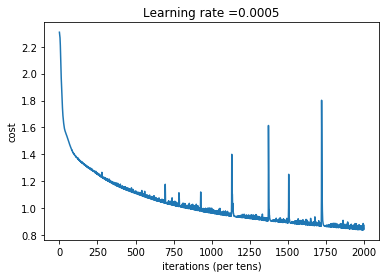

Parameters have been trained!
Train Accuracy: 0.695836
Test Accuracy: 0.65


In [33]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.0005,num_epochs=10000,print_cost=True)

Cost after epoch 0: 2.316967
Cost after epoch 100: 2.259073
Cost after epoch 200: 1.877751
Cost after epoch 300: 1.707635
Cost after epoch 400: 1.648954
Cost after epoch 500: 1.603976
Cost after epoch 600: 1.562921
Cost after epoch 700: 1.528023
Cost after epoch 800: 1.498628
Cost after epoch 900: 1.473879
Cost after epoch 1000: 1.453099
Cost after epoch 1100: 1.434377
Cost after epoch 1200: 1.418185
Cost after epoch 1300: 1.402194
Cost after epoch 1400: 1.387485
Cost after epoch 1500: 1.374815
Cost after epoch 1600: 1.362790
Cost after epoch 1700: 1.350830
Cost after epoch 1800: 1.339096
Cost after epoch 1900: 1.328878
Cost after epoch 2000: 1.318563
Cost after epoch 2100: 1.308095
Cost after epoch 2200: 1.297222
Cost after epoch 2300: 1.287822
Cost after epoch 2400: 1.279276
Cost after epoch 2500: 1.271032
Cost after epoch 2600: 1.263289
Cost after epoch 2700: 1.256248
Cost after epoch 2800: 1.249523
Cost after epoch 2900: 1.243054
Cost after epoch 3000: 1.236197
Cost after epoch 310

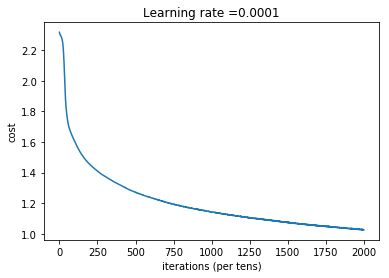

Parameters have been trained!
Train Accuracy: 0.629942
Test Accuracy: 0.63


In [34]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.0001,num_epochs=10000,print_cost=True)



Cost after epoch 0: 2.290926
Cost after epoch 100: 2.039756
Cost after epoch 200: 1.828624
Cost after epoch 300: 1.705487
Cost after epoch 400: 1.665467
Cost after epoch 500: 1.631157
Cost after epoch 600: 1.594634
Cost after epoch 700: 1.558595
Cost after epoch 800: 1.530413
Cost after epoch 900: 1.505132
Cost after epoch 1000: 1.484410
Cost after epoch 1100: 1.466384
Cost after epoch 1200: 1.449804
Cost after epoch 1300: 1.433668
Cost after epoch 1400: 1.419345
Cost after epoch 1500: 1.407423
Cost after epoch 1600: 1.396970
Cost after epoch 1700: 1.387273
Cost after epoch 1800: 1.378060
Cost after epoch 1900: 1.369416
Cost after epoch 2000: 1.361751
Cost after epoch 2100: 1.354396
Cost after epoch 2200: 1.347545
Cost after epoch 2300: 1.341040
Cost after epoch 2400: 1.333176
Cost after epoch 2500: 1.325452
Cost after epoch 2600: 1.316980
Cost after epoch 2700: 1.310486
Cost after epoch 2800: 1.302593
Cost after epoch 2900: 1.296239
Cost after epoch 3000: 1.290396
Cost after epoch 310

Cost after epoch 25200: 0.936072
Cost after epoch 25300: 0.935798
Cost after epoch 25400: 0.942094
Cost after epoch 25500: 0.934352
Cost after epoch 25600: 0.934291
Cost after epoch 25700: 0.936097
Cost after epoch 25800: 0.936125
Cost after epoch 25900: 0.931887
Cost after epoch 26000: 0.931002
Cost after epoch 26100: 0.936894
Cost after epoch 26200: 0.932880
Cost after epoch 26300: 0.936850
Cost after epoch 26400: 0.931209
Cost after epoch 26500: 0.930224
Cost after epoch 26600: 0.940133
Cost after epoch 26700: 0.929229
Cost after epoch 26800: 0.932522
Cost after epoch 26900: 0.926495
Cost after epoch 27000: 0.924192
Cost after epoch 27100: 0.924980
Cost after epoch 27200: 0.924394
Cost after epoch 27300: 0.924628
Cost after epoch 27400: 0.922713
Cost after epoch 27500: 0.921190
Cost after epoch 27600: 0.920394
Cost after epoch 27700: 0.920476
Cost after epoch 27800: 0.921569
Cost after epoch 27900: 0.920505
Cost after epoch 28000: 0.925474
Cost after epoch 28100: 0.918822
Cost after

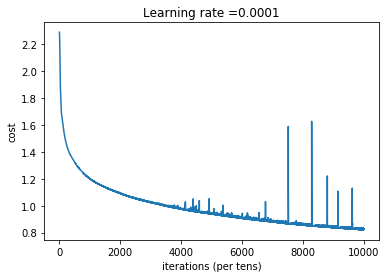

Parameters have been trained!
Train Accuracy: 0.703743
Test Accuracy: 0.61


In [35]:
parameters=model(XTrain,YTrain,XVal,YVal,learning_rate=.0001,num_epochs=50000,print_cost=True)